# Events Template

In [69]:
# Standard Libraries
import shutil
import urllib.request as urlrequest
from collections import Counter
from pathlib import Path
from pprint import pprint
from zipfile import ZipFile
import pandas as pd
import matplotlib.pyplot as plt
import datetime



In [22]:
ogd_server = 'http://opengamedata.fielddaylab.wisc.edu/'
server_data_path = 'data/AQUALAB/'
dataset_name = "AQUALAB_20230201_to_20230228"
zip_name = f"{dataset_name}_5de1a1f_events.zip"

file_url = f"{ogd_server}{server_data_path}{zip_name}"

# download the file if it doesn't exist.
if not Path(f'./{zip_name}').is_file():
    print(f"Didn't find the file {zip_name} locally, downloading from {ogd_server}...")
    !curl --ssl-no-revoke {file_url} -o {zipname}
    # with urlrequest.urlopen(ogd_server + zipname, verify=False) as remote_file, open(zipname, 'wb') as local_file:
    #     shutil.copyfileobj(remote_file, local_file)
    #     print(f"Successfully downloaded a copy of the file.")


Didn't find the file AQUALAB_20230201_to_20230228_5de1a1f_events.zip locally, downloading from http://opengamedata.fielddaylab.wisc.edu/...
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0curl: (6) Could not resolve host: file_url


In [23]:
# Get file path and create data frame
tsv_name = f"{dataset_name}_7565f43_player-features.tsv"
survey_path = Path("./") / dataset_name / tsv_name
if not survey_path.is_file():
    !unzip ./{zipname} -d {dataset_name}
raw_data = pd.read_csv(survey_path, sep='\t')

unzip:  cannot find or open ./{zipname}, ./{zipname}.zip or ./{zipname}.ZIP.


FileNotFoundError: [Errno 2] No such file or directory: 'AQUALAB_20230201_to_20230228/AQUALAB_20230201_to_20230228_7565f43_player-features.tsv'

# Not a very large dataset, just a snippet to get a few graphs out

In [24]:
raw_df = pd.read_csv('AQUALAB_20230201_to_20230228_5de1a1f.csv')
raw_df

,Unnamed: 0,session_id,app_id,timestamp,event_name,event_data,event_source,app_version,app_branch,log_version,offset,user_id,user_data,game_state,index
0,0,1675696545,AQUALAB,2023-02-06 15:17:17,room_changed,"{""app_flavor"": {""double_value"": null, ""float_v...",GAME,NaN,NaN,3,NaN,AbsorbedComma,{},{},1.0
1,1,1675696545,AQUALAB,2023-02-06 15:17:22,scene_changed,"{""app_flavor"": {""double_value"": null, ""float_v...",GAME,NaN,NaN,3,NaN,AbsorbedComma,{},{},2.0
2,2,1675696545,AQUALAB,2023-02-06 15:17:22,switch_job,"{""app_flavor"": {""double_value"": null, ""float_v...",GAME,NaN,NaN,3,NaN,AbsorbedComma,{},{},3.0
3,3,1675696545,AQUALAB,2023-02-06 15:17:28,open_status,"{""app_flavor"": {""double_value"": null, ""float_v...",GAME,NaN,NaN,3,NaN,AbsorbedComma,{},{},4.0
4,4,1675696545,AQUALAB,2023-02-06 15:17:28,status_open_job_tab,"{""app_flavor"": {""double_value"": null, ""float_v...",GAME,NaN,NaN,3,NaN,AbsorbedComma,{},{},5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4995,1676700987,AQUALAB,2023-02-18 06:23:17,begin_dive,"{""app_flavor"": {""double_value"": null, ""float_v...",GAME,NaN,NaN,3,NaN,AchingStump,{},{},113.0
4996,4996,1676700987,AQUALAB,2023-02-18 06:23:25,scene_changed,"{""app_flavor"": {""double_value"": null, ""float_v...",GAME,NaN,NaN,3,NaN,AchingStump,{},{},114.0
4997,4997,1676700987,AQUALAB,2023-02-18 06:23:25,SceneChangeFrequently,"{""time"": 25.0, ""level"": 30.0, ""scene_stopby"": ...",GENERATED,NaN,main,3,NaN,AchingStump,{},{},114.0
4998,4998,1676700987,AQUALAB,2023-02-18 06:23:25,script_fired,"{""app_flavor"": {""double_value"": null, ""float_v...",GAME,NaN,NaN,3,NaN,AchingStump,{},{},115.0


# Convert 'timestamp' to datetime

In [25]:
for i in range(len(raw_df)):
    if raw_df['timestamp'][i] != 0:
        raw_df['timestamp'][i] = datetime.datetime.strptime(raw_df['timestamp'][i], '%Y-%m-%d %H:%M:%S')


/tmp/ipykernel_8198/1763549488.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  raw_df['timestamp'][i] = datetime.datetime.strptime(raw_df['timestamp'][i], '%Y-%m-%d %H:%M:%S')


#### dataframe and visualization of time spent for a session

In [65]:
first_last_df = raw_df.groupby("user_id").agg({"timestamp": ["first", "last"]})

# flatten the column index
first_last_df.columns = ["_".join(col) for col in first_last_df.columns]
first_last_df = first_last_df.reset_index()
first_last_df["time_diff"] = first_last_df["timestamp_last"] - first_last_df["timestamp_first"]
first_last_df

,user_id,timestamp_first,timestamp_last,time_diff
0,AbsorbedComma,2023-02-06 15:17:17,2023-02-06 16:37:27,1:20:10
1,AbsorbedForest,2023-02-05 22:11:32,2023-02-05 22:20:40,0:09:08
2,AbsorbedSound,2023-02-06 15:42:42,2023-02-06 15:54:22,0:11:40
3,AbstractBrow,2023-02-16 19:31:38,2023-02-21 18:57:11,"4 days, 23:25:33"
4,AchingPecan,2023-02-21 19:33:19,2023-02-26 20:35:33,"5 days, 1:02:14"
5,AchingStump,2023-02-18 06:17:25,2023-02-18 06:23:25,0:06:00


Text(0.5, 1.0, 'Time Difference between First and Last Timestamp for Each User')

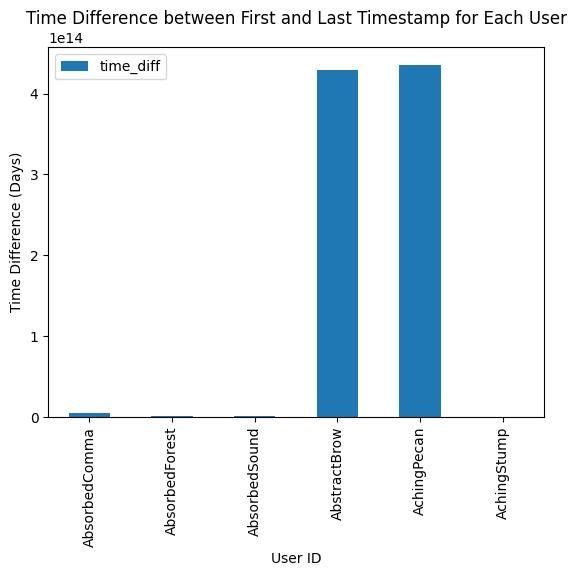

In [68]:
first_last_df.plot(kind="bar", x="user_id", y="time_diff")
plt.xlabel("User ID")
plt.ylabel("Time Difference (Days)")
plt.title("Time Difference between First and Last Timestamp for Each User")


#### Groupby each user

In [27]:
raw_df.groupby('user_id').count()


,Unnamed: 0,session_id,app_id,timestamp,event_name,event_data,event_source,app_version,app_branch,log_version,offset,user_data,game_state,index
user_id,,,,,,,,,,,,,,
AbsorbedComma,827,827,827,827,827,827,827,0,56,827,0,827,827,827
AbsorbedForest,146,146,146,146,146,146,146,0,3,146,0,146,146,146
AbsorbedSound,199,199,199,199,199,199,199,0,7,199,0,199,199,199
AbstractBrow,682,682,682,682,682,682,682,0,64,682,0,682,682,682
AchingPecan,2944,2944,2944,2944,2944,2944,2944,0,189,2944,0,2944,2944,2944
AchingStump,125,125,125,125,125,125,125,0,9,125,0,125,125,125


#### Groupby session id

In [70]:
raw_df.groupby('session_id').count()


,Unnamed: 0,app_id,timestamp,event_name,event_data,event_source,app_version,app_branch,log_version,offset,user_id,user_data,game_state,index
session_id,,,,,,,,,,,,,,
1675635046,146,146,146,146,146,146,0,3,146,0,146,146,146,146
1675696545,827,827,827,827,827,827,0,56,827,0,827,827,827,827
1675698119,199,199,199,199,199,199,0,7,199,0,199,199,199,199
1676575863,169,169,169,169,169,169,0,15,169,0,169,169,169,169
1676646310,488,488,488,488,488,488,0,42,488,0,488,488,488,488
1676700987,125,125,125,125,125,125,0,9,125,0,125,125,125,125
1677004363,25,25,25,25,25,25,0,7,25,0,25,25,25,25
1677007956,461,461,461,461,461,461,0,23,461,0,461,461,461,461
1677014123,1007,1007,1007,1007,1007,1007,0,77,1007,0,1007,1007,1007,1007


### Visualize of events counter

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52],
 [Text(0, 0, 'room_changed'),
  Text(1, 0, 'scene_changed'),
  Text(2, 0, 'switch_job'),
  Text(3, 0, 'open_status'),
  Text(4, 0, 'status_open_job_tab'),
  Text(5, 0, 'close_status'),
  Text(6, 0, 'SceneChangeFrequently'),
  Text(7, 0, 'begin_dive'),
  Text(8, 0, 'Idle'),
  Text(9, 0, 'CustomDetector'),
  Text(10, 0, 'receive_fact'),
  Text(11, 0, 'script_fired'),
  Text(12, 0, 'script_line_displayed'),
  Text(13, 0, 'open_bestiary'),
  Text(14, 0, 'bestiary_open_environments_tab'),
  Text(15, 0, 'bestiary_select_environment'),
  Text(16, 0, 'close_bestiary'),
  Text(17, 0, 'bestiary_open_species_tab'),
  Text(18, 0, 'receive_entity'),
  Text(19, 0, 'ask_for_help'),
  Text(20, 0, '

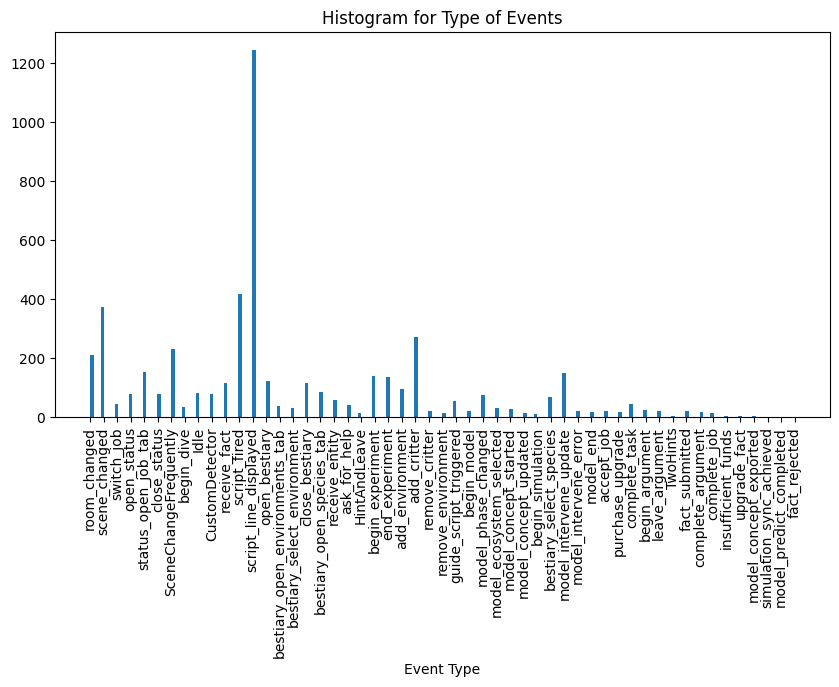

In [28]:
#jobs completed
f, ax = plt.subplots(figsize=(10, 5))
ax.hist(raw_df['event_name'], bins=200)
ax.set_xlabel("Event Type")
ax.set_title("Histogram for Type of Events")
plt.xticks(rotation = 90) # Rotates X-Axis Ticks by 90-degrees


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, '1675696545'),
  Text(1, 0, 'Not Implemented'),
  Text(2, 0, '1675635046'),
  Text(3, 0, '1675698119'),
  Text(4, 0, '1676575863'),
  Text(5, 0, '1676646310'),
  Text(6, 0, '1677004363'),
  Text(7, 0, '1677007956'),
  Text(8, 0, '1677014123'),
  Text(9, 0, '1677428245'),
  Text(10, 0, '1677439900'),
  Text(11, 0, '1676700987')])

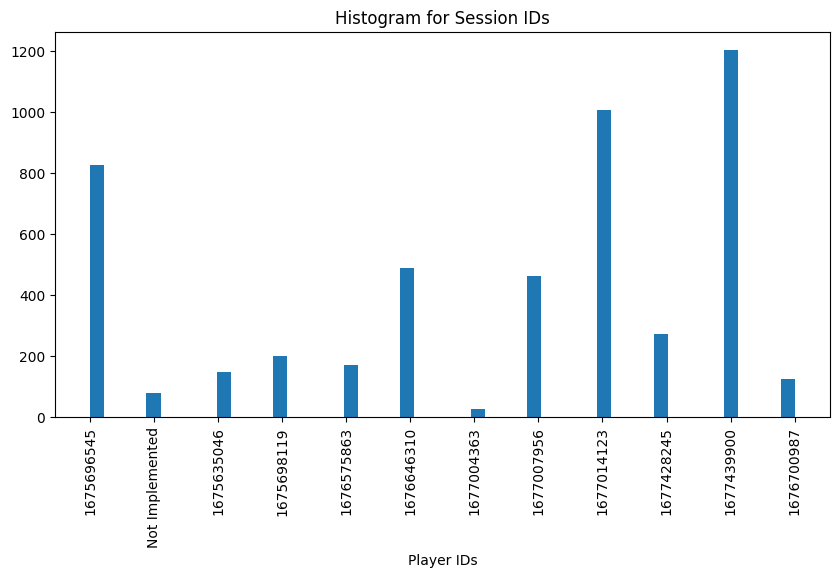

In [29]:
#jobs completed
f, ax = plt.subplots(figsize=(10, 5))
ax.hist(raw_df['session_id'], bins=50)
ax.set_xlabel("Player IDs")
ax.set_title("Histogram for Session IDs")
plt.xticks(rotation = 90) # Rotates X-Axis Ticks by 45-degrees

<Axes: >

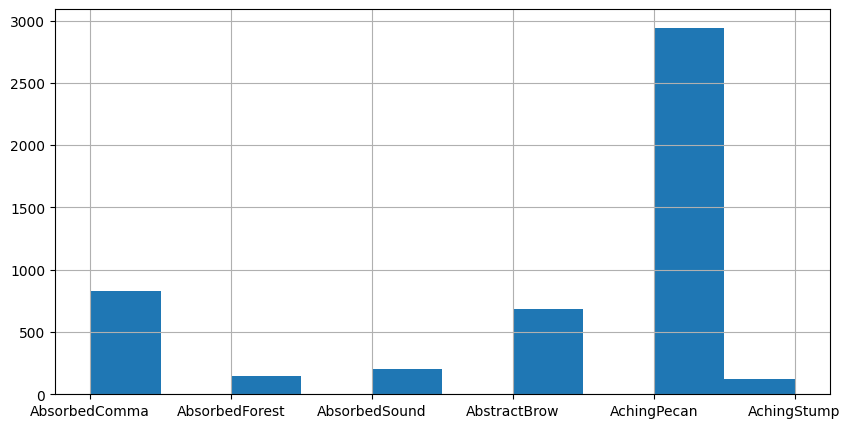

In [30]:
user_ids = list(set(raw_df['user_id']))
        
fig, ax = plt.subplots(figsize=(10,5))         
raw_df['user_id'].hist(ax=ax)